# Titanic - Machine Learning from Disaster

# Dataset Description
## Overview
The data has been split into two groups:

#### . training set (train.csv)
#### . test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.


# Data Anaylsis

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
train=pd.read_csv(r'C:\Users\dell\Desktop\Data Science & ML\TITANIC\train.csv')
test=pd.read_csv(r'C:\Users\dell\Desktop\Data Science & ML\TITANIC\test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Data Visualization

<AxesSubplot:>

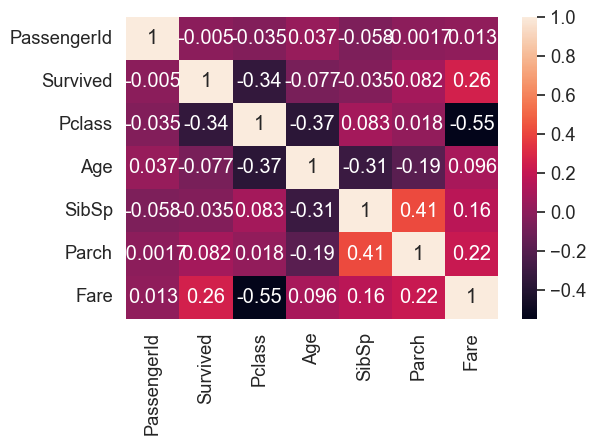

In [5]:
fig = plt.figure(dpi = 100)
sns.set(rc={'figure.figsize':[25,10]},font_scale=1.2)
sns.heatmap(train.corr(), annot = True)

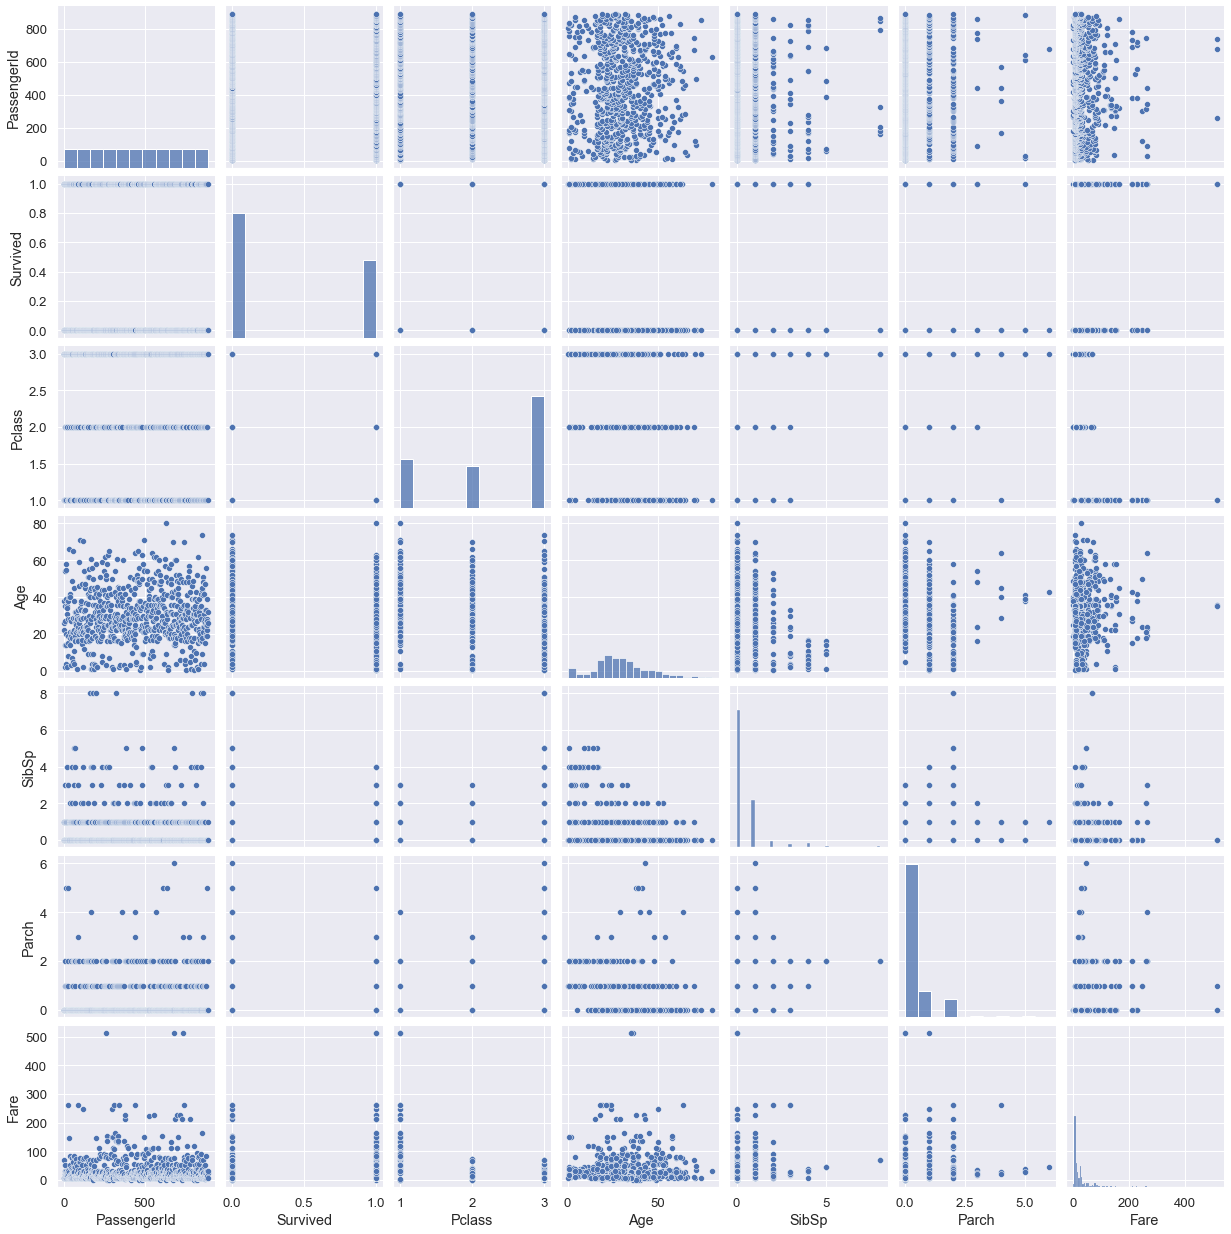

In [6]:
sns.pairplot(train)

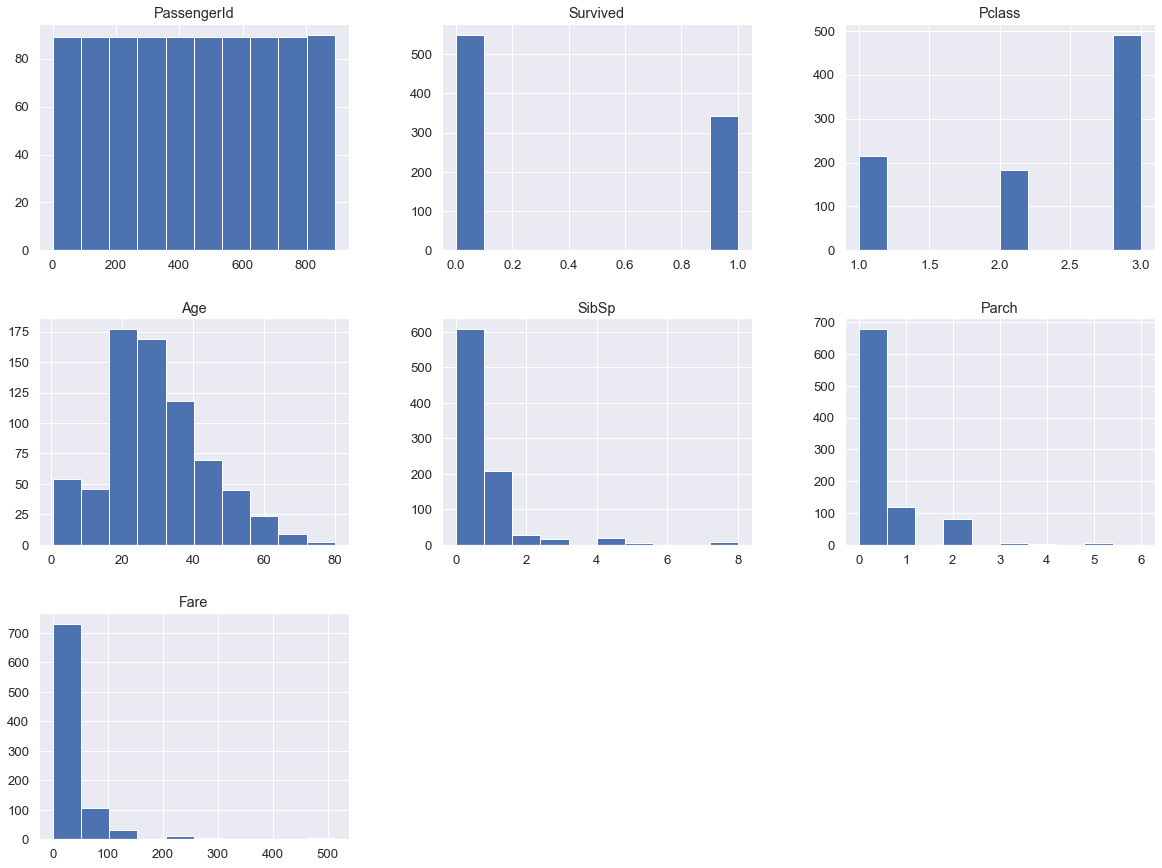

In [7]:
train.hist(figsize=(20,15))
plt.show()

In [8]:
#number of people Survived and dead
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

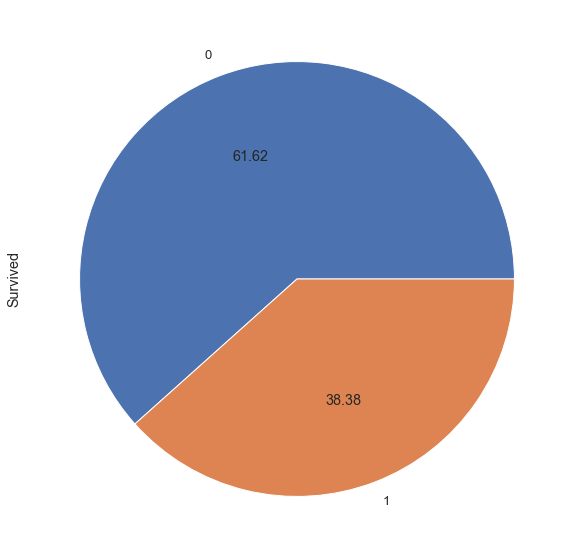

In [9]:
train.Survived.value_counts().plot.pie(autopct='%0.2f')

In [10]:
#number of people gender 
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

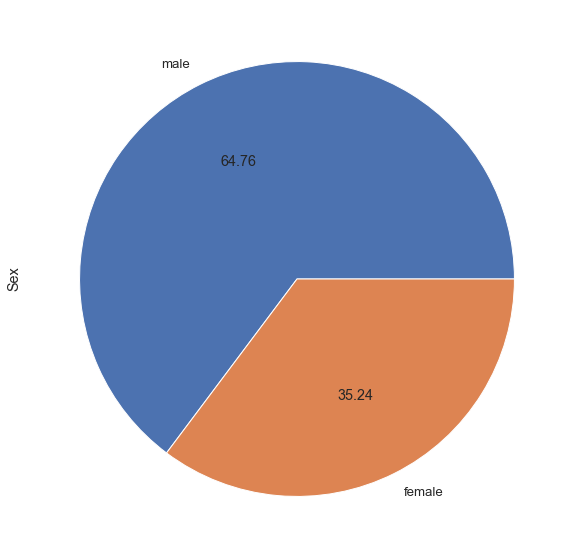

In [11]:
train.Sex.value_counts().plot.pie(autopct='%0.2f')

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

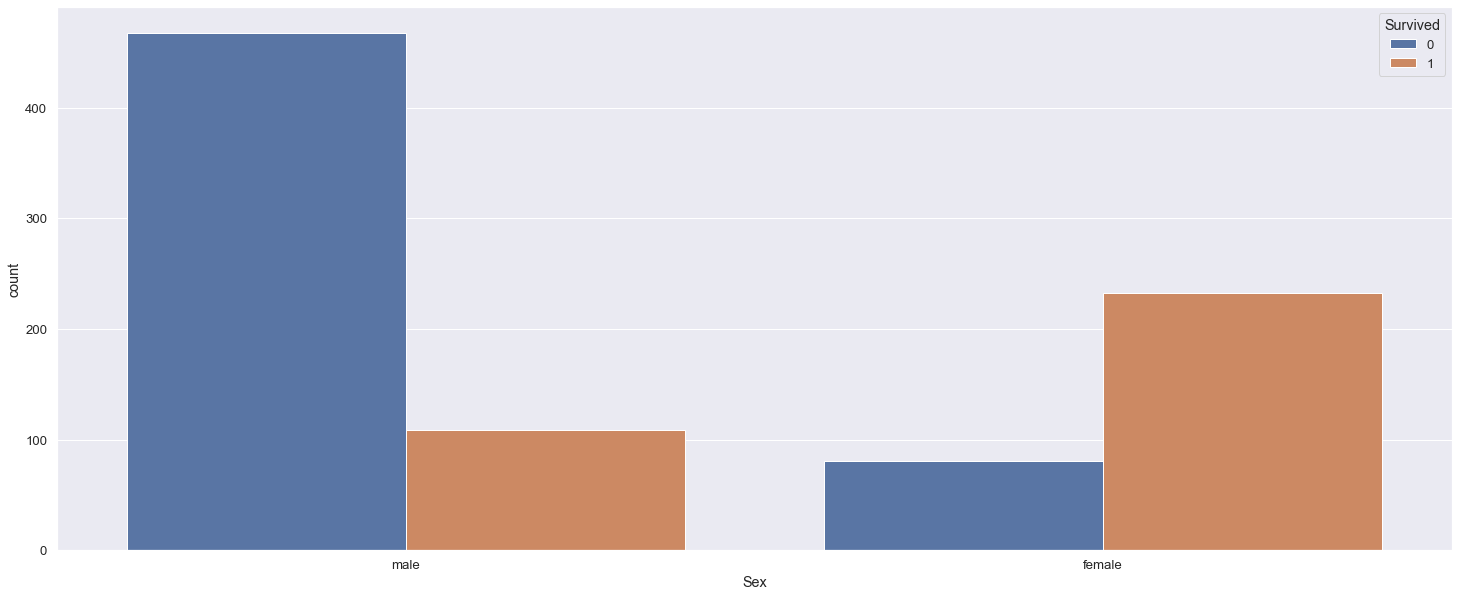

In [12]:
sns.countplot(train.Sex,hue=train.Survived)

# Data Cleaning & Pre_procssing 

In [13]:
null=train.isnull().sum()
null[null>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [14]:
def clean(d):
    d.drop(['Name','Cabin','Fare','Ticket','Embarked'],axis=1,inplace=True)
    d.Age=train.Age.fillna(train.Age.median())
    d.dropna()
    return d

In [15]:
clean(train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


In [16]:
clean(test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,22.0,0,0
1,893,3,female,38.0,1,0
2,894,2,male,26.0,0,0
3,895,3,male,35.0,0,0
4,896,3,female,35.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,28.0,0,0
414,1306,1,female,44.0,0,0
415,1307,3,male,28.0,0,0
416,1308,3,male,34.0,0,0


In [17]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [18]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [19]:
#Transform Data
train.replace({'Sex':{"male":1,"female":0}},inplace=True)
test.replace({'Sex':{"male":1,"female":0}},inplace=True)

In [20]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0
887,888,1,1,0,19.0,0,0
888,889,0,3,0,28.0,1,2
889,890,1,1,1,26.0,0,0


# Machine Learing_Creat the model 

In [21]:
#Creat The Model
x=train.drop(['Survived'],axis=1)
y=train.Survived

In [22]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.8, random_state=42)

In [30]:
from sklearn.metrics import accuracy_score
accuracies=[]
def all(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy=accuracy_score( y_pred,y_test)
    print('Accuracy is :',accuracy)
    accuracies.append(accuracy)

In [31]:
model1=KNeighborsClassifier()
all(model1)

Accuracy is : 0.5469845722300141


In [32]:
model2=GaussianNB()
all(model2)

Accuracy is : 0.791023842917251


In [33]:
model3=SVC()
all(model3)

Accuracy is : 0.6115007012622721


In [34]:
model4=DecisionTreeClassifier()
all(model4)

Accuracy is : 0.7671809256661991


In [35]:
model5=RandomForestClassifier()
all(model5)

Accuracy is : 0.8064516129032258


In [36]:
model7=GradientBoostingClassifier()
all(model7)

Accuracy is : 0.8022440392706872


In [37]:
model6=LogisticRegression()
all(model6)

Accuracy is : 0.7727910238429172


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
Algorithms=['KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','LogisticRegression','GaussianNB']


In [39]:
new=pd.DataFrame({'Algorithms':Algorithms,'accuracies':accuracies})

In [41]:
new.style.background_gradient()

,Algorithms,accuracies
0,KNeighborsClassifier,0.546985
1,SVC,0.791024
2,DecisionTreeClassifier,0.611501
3,RandomForestClassifier,0.767181
4,GradientBoostingClassifier,0.806452
5,LogisticRegression,0.802244
6,GaussianNB,0.772791


In [42]:
modelx=GradientBoostingClassifier()
modelx.fit(X_train,y_train)

GradientBoostingClassifier()

In [44]:
pred=modelx.predict(test)

In [46]:
final=test.PassengerId

In [47]:
new_dataframe=pd.DataFrame({'passengerId':final,'Survived':pred})

In [48]:
new_dataframe.to_csv('submission.csv',index=False)